### Placement Precision: Elevating Campus Recruitment Through Predictive Analytics

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
dt=pd.read_csv("F:\\datasets\\Placement.csv")
dt

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,0,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,0,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,0,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,1,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [3]:
dt.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:
dt.tail()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
210,211,0,80.6,Others,82.0,Others,Commerce,77.6,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,0,58.0,Others,60.0,Others,Science,72.0,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,0,67.0,Others,67.0,Others,Commerce,73.0,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,1,74.0,Others,66.0,Others,Commerce,58.0,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0
214,215,0,62.0,Central,58.0,Others,Science,53.0,Comm&Mgmt,No,89.0,Mkt&HR,60.22,Not Placed,NaN


In [5]:
dt.shape

(215, 15)

In [6]:
print("Number of rows",dt.shape[0])
print("Number of coloums",dt.shape[1])

Number of rows 215
Number of coloums 15


In [7]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    int64  
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(2), object(7)
memory usage: 25.3+ KB


In [8]:
dt.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [9]:
dt.describe()

,sl_no,gender,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,0.353488,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,0.479168,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,0.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,0.000000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,0.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,1.000000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,1.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [10]:
dt.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

**How many students are placed ?**

In [11]:
dt['status'].unique()

array(['Placed', 'Not Placed'], dtype=object)

In [12]:
dt['status'].value_counts()

status
Placed        148
Not Placed     67
Name: count, dtype: int64

<Axes: xlabel='status', ylabel='count'>

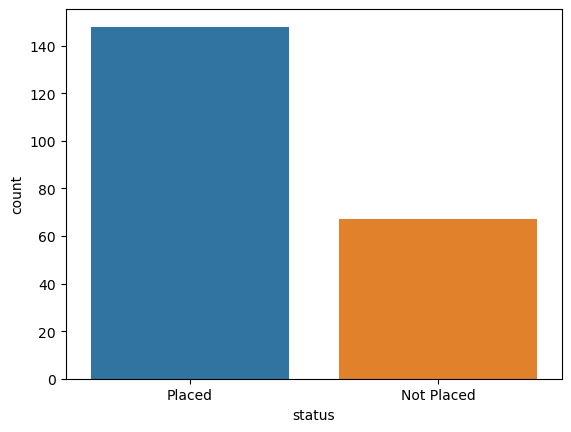

In [13]:
sns.countplot(dt,x='status')

In [14]:
#dt[(dt["degree_t"]=="Sci&Tech") & (dt["status"]=="placed")].sort_values(by='salary',ascending=False)

In [15]:
dt[dt["salary"]>=40000].degree_t.value_counts()

degree_t
Comm&Mgmt    102
Sci&Tech      41
Others         5
Name: count, dtype: int64

In [16]:
dt.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [17]:
d=dt.drop(["sl_no","salary"],axis=1)
d.head(2)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed


**Encoding the categorical coloums**

In [18]:
d['ssc_b'].unique()

array(['Others', 'Central'], dtype=object)

In [19]:
d['ssc_b']=d['ssc_b'].map({'Central':1,'Others':0})
d.head(2)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,0,67.00,0,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,0,79.33,1,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed


In [20]:
d['hsc_b'].unique()

array(['Others', 'Central'], dtype=object)

In [21]:
d['hsc_b']=d['hsc_b'].map({'Central':1,'Others':0})
d.head(2)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,0,67.00,0,91.00,0,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,0,79.33,1,78.33,0,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed


In [22]:
d['hsc_s'].unique()

array(['Commerce', 'Science', 'Arts'], dtype=object)

In [23]:
d['hsc_s']=d['hsc_s'].map({'Commerce':2,'Science':1,'Arts':0})
d.head(2)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,0,67.00,0,91.00,0,2,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,0,79.33,1,78.33,0,1,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed


In [24]:
d['degree_t'].unique()

array(['Sci&Tech', 'Comm&Mgmt', 'Others'], dtype=object)

In [25]:
d['degree_t']=d['degree_t'].map({'Sci&Tech':2,'Comm&Mgmt':1,'Others':0})
d.head(2)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,0,67.00,0,91.00,0,2,58.00,2,No,55.0,Mkt&HR,58.80,Placed
1,0,79.33,1,78.33,0,1,77.48,2,Yes,86.5,Mkt&Fin,66.28,Placed


In [26]:
d['workex'].unique()

array(['No', 'Yes'], dtype=object)

In [27]:
d['workex']=d['workex'].map({'No':1,'Yes':0,})
d.head(2)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,0,67.00,0,91.00,0,2,58.00,2,1,55.0,Mkt&HR,58.80,Placed
1,0,79.33,1,78.33,0,1,77.48,2,0,86.5,Mkt&Fin,66.28,Placed


In [28]:
d['specialisation'].unique()

array(['Mkt&HR', 'Mkt&Fin'], dtype=object)

In [29]:
d['specialisation']=d['specialisation'].map({'Mkt&HR':1,'Mkt&Fin':0,})
d.head(2)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,0,67.00,0,91.00,0,2,58.00,2,1,55.0,1,58.80,Placed
1,0,79.33,1,78.33,0,1,77.48,2,0,86.5,0,66.28,Placed


In [30]:
d['status'].unique()

array(['Placed', 'Not Placed'], dtype=object)

In [31]:
d['status']=d['status'].map({'Placed':1,'Not Placed':0,}) 
d.head(2)                               #1=placed, 0= not placed

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,0,67.00,0,91.00,0,2,58.00,2,1,55.0,1,58.80,1
1,0,79.33,1,78.33,0,1,77.48,2,0,86.5,0,66.28,1


In [32]:
dt.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [33]:
X=d.drop("status",axis=1)
y=d["status"]

In [34]:
from sklearn.model_selection import train_test_split
x_train ,x_test, y_train, y_test = train_test_split (X,y,test_size=0.3,random_state=0)  

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [36]:
lr= LogisticRegression()
lr.fit(x_train,y_train)

sv = SVC()
sv.fit(x_train,y_train)

knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)

rf=RandomForestClassifier()
rf.fit(x_train,y_train)

gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)



GradientBoostingClassifier()

In [37]:
y_pred1=lr.predict(x_test)
y_pred2=sv.predict(x_test)
y_pred3=knn.predict(x_test)
y_pred4=dtc.predict(x_test)
y_pred5=rf.predict(x_test)
y_pred6=gb.predict(x_test)

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
score1=accuracy_score(y_test,y_pred1)
score2=accuracy_score(y_test,y_pred2)
score3=accuracy_score(y_test,y_pred3)
score4=accuracy_score(y_test,y_pred4)
score5=accuracy_score(y_test,y_pred5)
score6=accuracy_score(y_test,y_pred6)

In [40]:
print(score1,score2,score3,score4,score5,score6)

0.8461538461538461 0.7846153846153846 0.7846153846153846 0.8 0.7692307692307693 0.8


In [41]:
p=pd.DataFrame({'Models':['LR','SVC','KNN','DTC','RF','GB'],
            'Accuracy':[score1*100,score2*100,score3*100,score4*100,score5*100,score6*100]})
p

,Models,Accuracy
0,LR,84.615385
1,SVC,78.461538
2,KNN,78.461538
3,DTC,80.000000
4,RF,76.923077
5,GB,80.000000


<Axes: xlabel='Models', ylabel='Accuracy'>

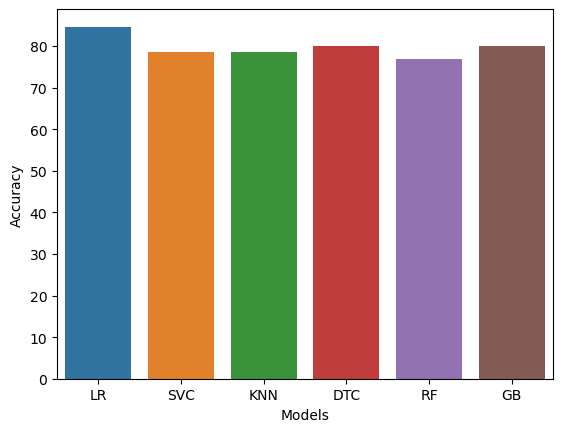

In [42]:
sns.barplot(p,x='Models',y='Accuracy')

**prediction on new data**

In [43]:
new_data=pd.DataFrame({'gender':0,
                       'ssc_p':67.0,
                       'ssc_b':0,
                       'hsc_p':91.0,
                       'hsc_b':0,
                       'hsc_s':1,
                       'degree_p':58.0,  
                       'degree_t':2,     
                       'workex':0,
                       'etest_p':55.0,
                       'specialisation':1,
                       'mba_p':58.8,},index=[0])

In [44]:
new_data

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,0,67.0,0,91.0,0,1,58.0,2,0,55.0,1,58.8


In [45]:
lr= LogisticRegression()
lr.fit(X,y)

LogisticRegression()

In [46]:
l=lr.predict(new_data)
l

array([1], dtype=int64)

here 1=placed, 0= not placed

In [47]:
p=lr.predict(new_data)
prob=lr.predict_proba(new_data)
if p==1:
    print('placed')
    print(f"that person will be placed with probability of {prob[0][1]:2f}")
else:
    print("Not placed")

placed
that person will be placed with probability of 0.993104


In [48]:
prob

array([[0.00689604, 0.99310396]])